In [1]:
import numpy as np
import sympy as sym
import scipy
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm

### Predicting Bike Rentals Based on Weather
There is a publicly available dataset about bike  rentals  in  Seoul.The  dataset  contains  nearly  nine  thousand  observations  of data  about  the  number  of  bikes  that  were  rented  in  the  city  and  variables  about  the weather including temperature, humidity, rainfall, windspeed, and so on.<br>The  purpose  of  the  dataset  is  to  predict  the  demand  for  bike  sharing  based  on weather and season. That is important because it will help bike rental companies and local  governments  optimize  the  availability  of  healthier  modes  of  transportation. Its a great dataset, there’s a lot that could be done with it.
url="https://studylib.net/viewer/awayid=26139844&url=https%3A%2F%2Farchive.ics.uci.edu%2Fml%2Fdatasets%2FSeoul%2BBike%2BSharing%2BDemand&page=209"

In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00560/SeoulBikeData.csv"
df = pd.read_csv(url,sep=',',encoding='unicode_escape')
df.head(10)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.00,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.00,0.0,0.0,Winter,No Holiday,Yes
5,01/12/2017,100,5,-6.4,37,1.5,2000,-18.7,0.00,0.0,0.0,Winter,No Holiday,Yes
6,01/12/2017,181,6,-6.6,35,1.3,2000,-19.5,0.00,0.0,0.0,Winter,No Holiday,Yes
7,01/12/2017,460,7,-7.4,38,0.9,2000,-19.3,0.00,0.0,0.0,Winter,No Holiday,Yes
8,01/12/2017,930,8,-7.6,37,1.1,2000,-19.8,0.01,0.0,0.0,Winter,No Holiday,Yes
9,01/12/2017,490,9,-6.5,27,0.5,1928,-22.4,0.23,0.0,0.0,Winter,No Holiday,Yes


### The below graph shows  the  data  from  bike  count  rentals  (the  dependent variable) and rainfall (one of the independent variables).

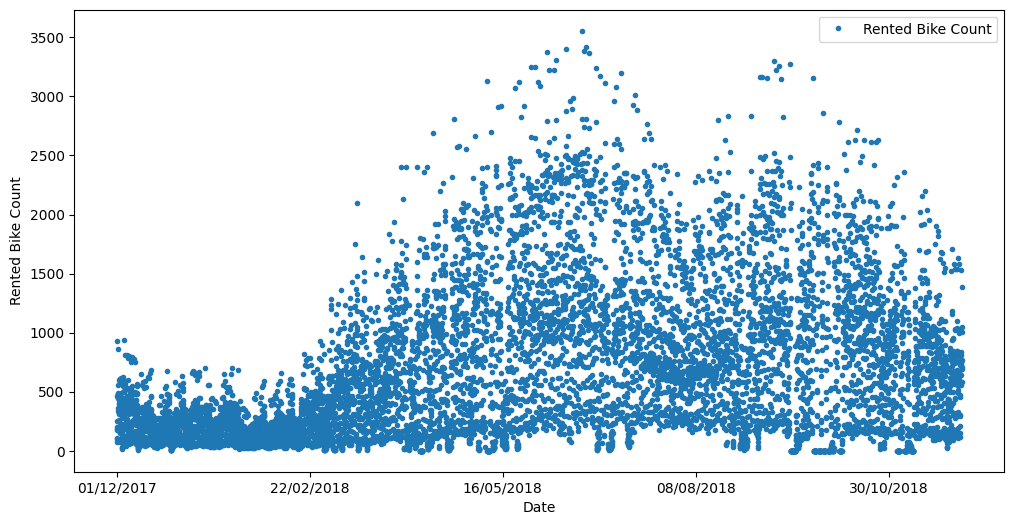

In [3]:
#scatter plot between date and rented bike count
df.plot(x='Date',y='Rented Bike Count',figsize=(12,6),ylabel='Rented Bike Count',marker='.',linestyle='none')
plt.show()

### In the graph below, notice  that  rainfall  is  a  sparse  variable it’s  mostly  zeros  with  a  relatively  smallnumber of nonzero values.

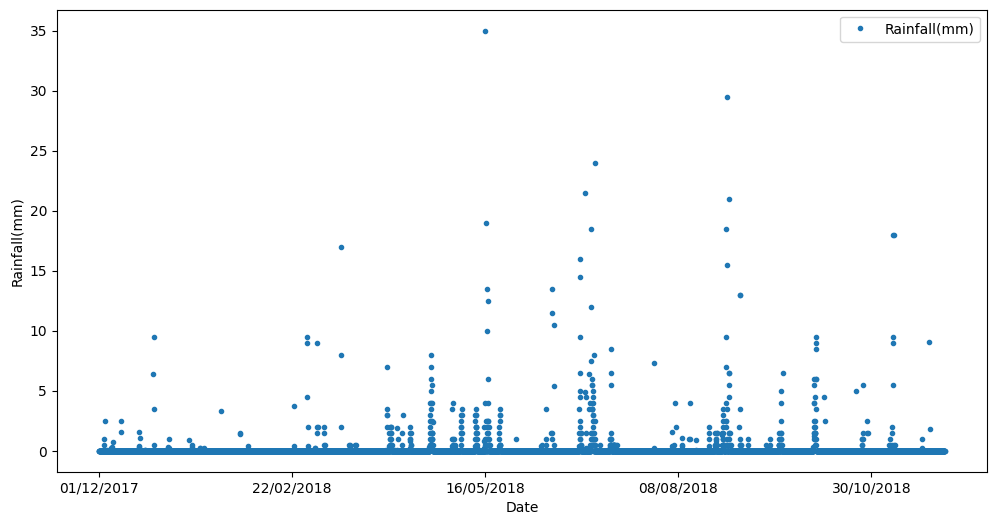

In [4]:
#scatter plot between date and Rainfall
df.plot(x='Date',y='Rainfall(mm)',figsize=(12,6),ylabel='Rainfall(mm)',marker='.',linestyle='none')
plt.show()

### Co-relation Matix
Inspecting correlation  matrices  is  always  a  good  idea  before  starting  statistical  analyses,  because  it will  show  which  variables  (if  any)  are  correlated  and  can  reveal  errors  in  the  data(e.g.,  if  two  supposedly  different  variables  are  perfectly  correlated).

In [5]:
df.corr(numeric_only=True)

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
Rented Bike Count,1.000000,0.410257,0.538558,-0.199780,0.121108,0.199280,0.379788,0.261837,-0.123074,-0.141804
Hour,0.410257,1.000000,0.124114,-0.241644,0.285197,0.098753,0.003054,0.145131,0.008715,-0.021516
Temperature(°C),0.538558,0.124114,1.000000,0.159371,-0.036252,0.034794,0.912798,0.353505,0.050282,-0.218405
Humidity(%),-0.199780,-0.241644,0.159371,1.000000,-0.336683,-0.543090,0.536894,-0.461919,0.236397,0.108183
Wind speed (m/s),0.121108,0.285197,-0.036252,-0.336683,1.000000,0.171507,-0.176486,0.332274,-0.019674,-0.003554
Visibility (10m),0.199280,0.098753,0.034794,-0.543090,0.171507,1.000000,-0.176630,0.149738,-0.167629,-0.121695
Dew point temperature(°C),0.379788,0.003054,0.912798,0.536894,-0.176486,-0.176630,1.000000,0.094381,0.125597,-0.150887
Solar Radiation (MJ/m2),0.261837,0.145131,0.353505,-0.461919,0.332274,0.149738,0.094381,1.000000,-0.074290,-0.072301
Rainfall(mm),-0.123074,0.008715,0.050282,0.236397,-0.019674,-0.167629,0.125597,-0.074290,1.000000,0.008500
Snowfall (cm),-0.141804,-0.021516,-0.218405,0.108183,-0.003554,-0.121695,-0.150887,-0.072301,0.008500,1.000000


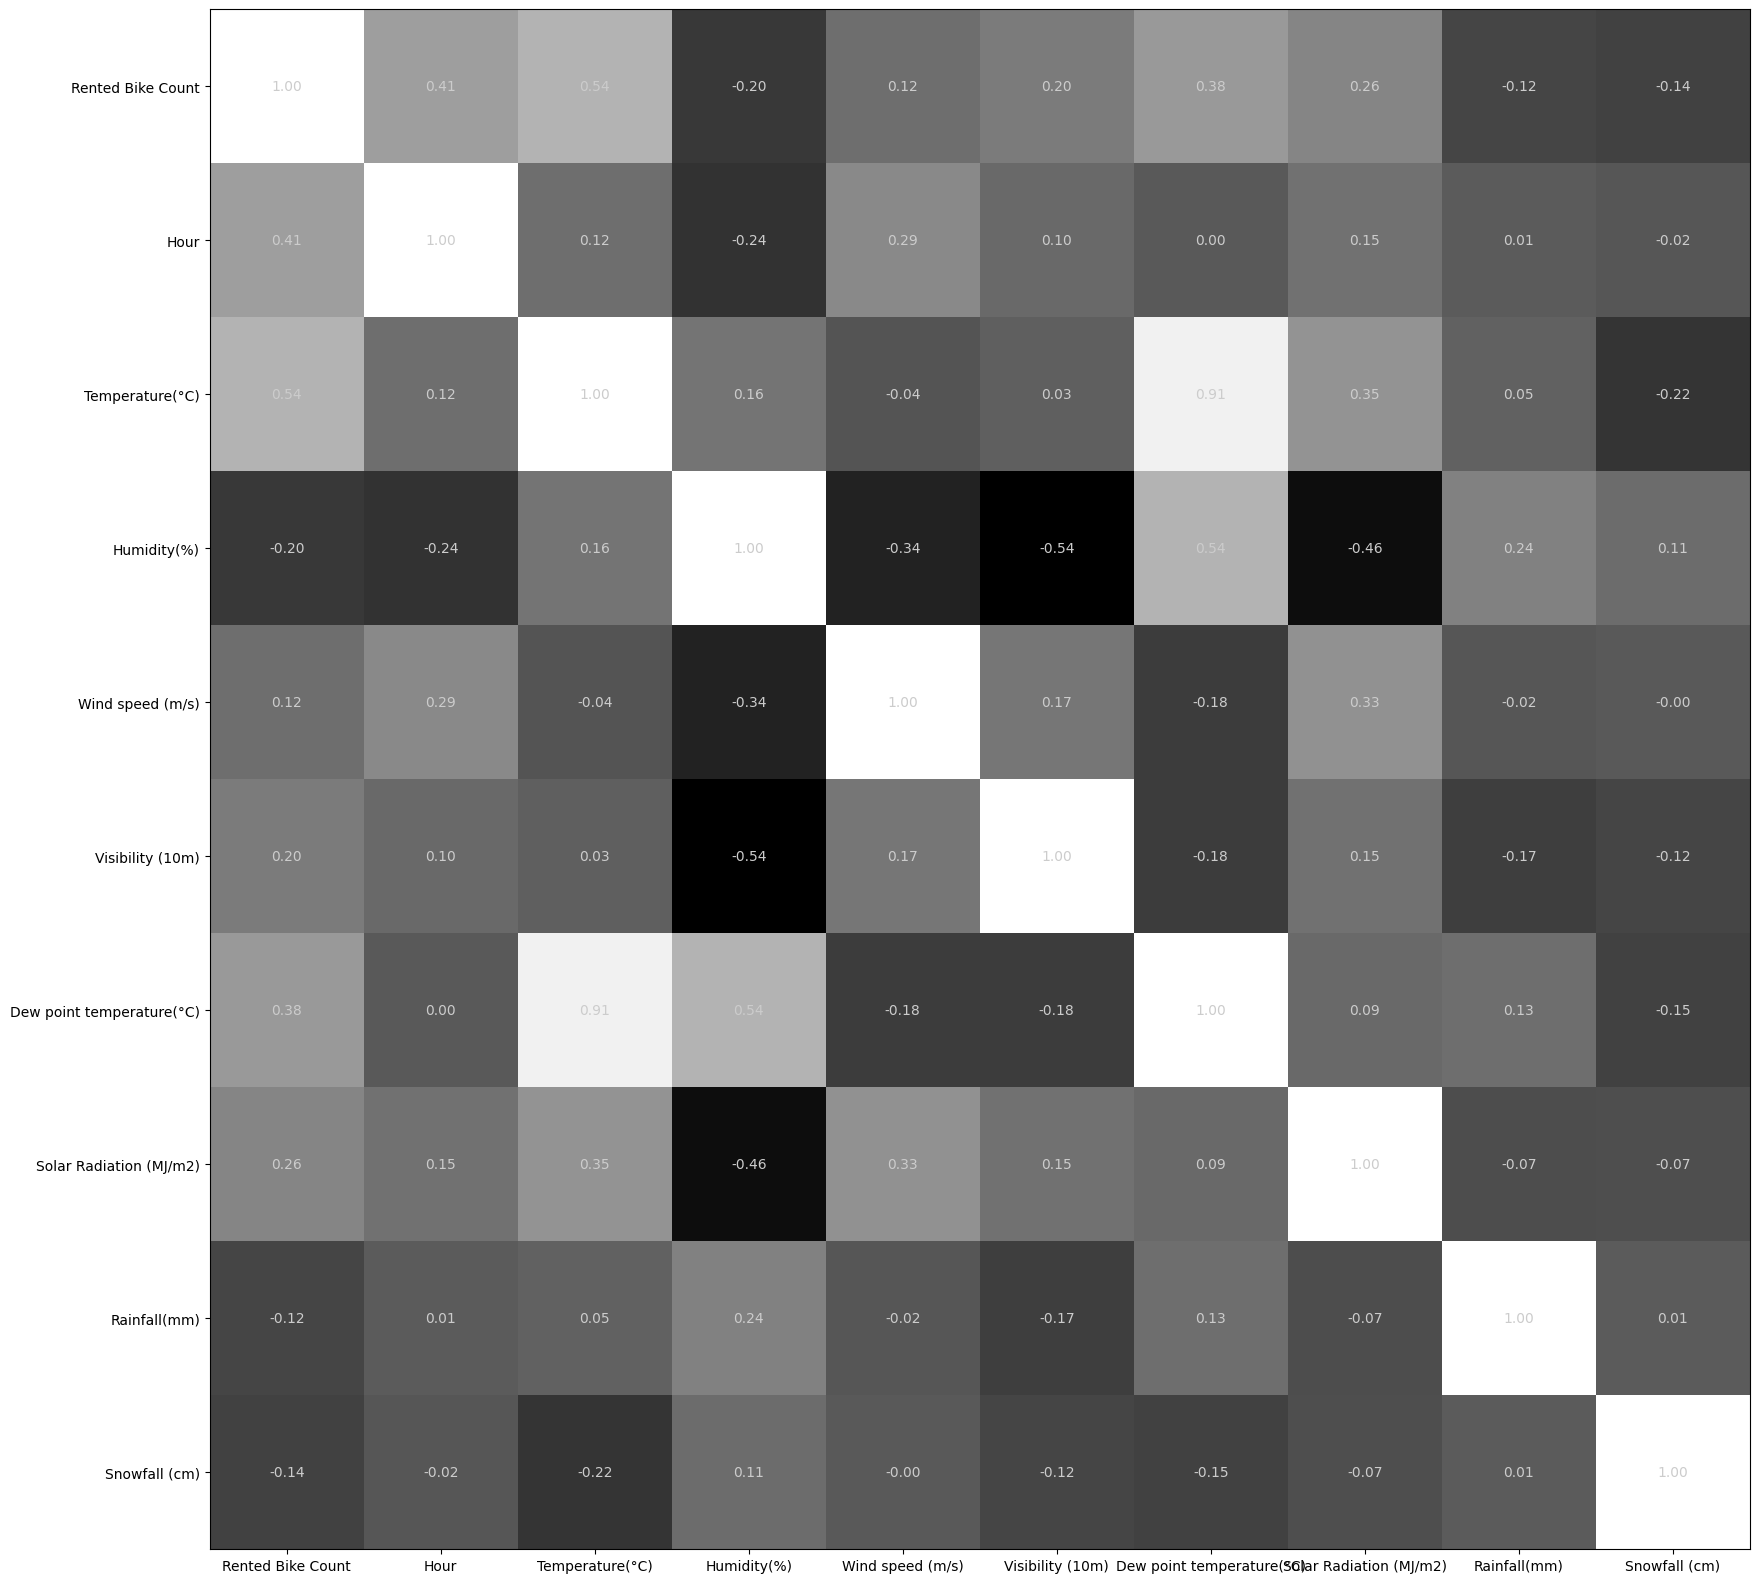

In [6]:
### show the correlation matrix in an image

R = df.corr(numeric_only=True)
# draw the image
plt.figure(figsize=(20,20))
plt.imshow(R.values,cmap='gray')
plt.xticks(range(10),labels = R.columns)
plt.yticks(range(10),labels = R.columns)

# text labels
for (j,i),num in np.ndenumerate(R.values):
  plt.text(i,j,f'{num:.2f}',color=[.8,.8,.8],ha='center',va='center',fontsize=10)

plt.show()

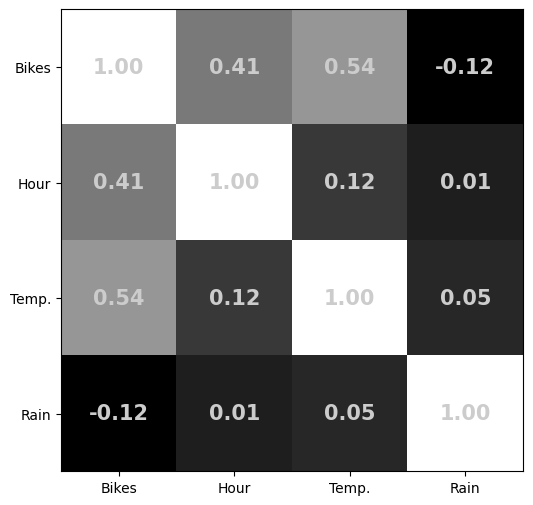

In [7]:
### show the correlation matrix in an image

# only using a few columns
columns_to_use = ['Rented Bike Count','Hour','Temperature(°C)','Rainfall(mm)']
cols_short = ['Bikes','Hour','Temp.','Rain'] # for axis labeleing

# re-compute the correlation matrix
R = df[columns_to_use].corr()

# draw the image
plt.figure(figsize=(6,6))
plt.imshow(R.values,cmap='gray')
plt.xticks(range(4),labels=cols_short)
plt.yticks(range(4),labels=cols_short)

# text labels
for (j,i),num in np.ndenumerate(R.values):
  plt.text(i,j,f'{num:.2f}',color=[.8,.8,.8],ha='center',va='center',fontweight='bold',fontsize=15)

plt.show()

In  this  case,  wesee  that  bike  rental  count  is  positively  correlated  with  hour  and  temperature  (people rent  more  bikes  later  in  the  day  and  when  the  weather  is  warmer)  and  negatively correlated  with  rainfall.  (Note  that  I’m  not  showing  statistical  significance  here,  so these interpretations are qualitative.)

In  the  first  analysis,  I  want  to  predict  bike  rental  counts  based  on  rainfall  and  the seasons.  The  seasons  (winter,  spring,  summer,  fall)  are  text  labels  in  the  dataset,  and we  need  to  convert  them  to  numbers  for  the  analysis.  We  could  translate  the  four seasons  into  the  numbers  1–4,  but  seasons  are  circular  while  regressions  are  linear.<br> There  are  a  few  ways  to  deal  with  this,  including  using  an  ANOVA  instead  of  a regression, using one-hot-encoding (used in deep learning models), or binarizing the seasons.  I’m  going  to  take  the  latter  approach  and  label  autumn  and  winter  “0”  and spring and summer “1”. The interpretation is that a positive beta coefficient indicates more bike rentals in spring/summer compared to autumn/winter.

#### Tangential note: on the one hand, I could have made things simpler by selecting only continuous variables. But I want to stress that there is more to data science than just applying  a  formula  to  a  dataset;  there  are  many  nontrivial  decisions  that  affect  the kinds of analyses you can do, and therefore the kinds of results you can obtain.

In [8]:
# binarize the seasons
df.replace(['Spring','Summer', 'Autumn','Winter'],[1,1,0,0], inplace=True)
df.head(10)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.00,0.0,0.0,0,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.00,0.0,0.0,0,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.00,0.0,0.0,0,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.00,0.0,0.0,0,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.00,0.0,0.0,0,No Holiday,Yes
5,01/12/2017,100,5,-6.4,37,1.5,2000,-18.7,0.00,0.0,0.0,0,No Holiday,Yes
6,01/12/2017,181,6,-6.6,35,1.3,2000,-19.5,0.00,0.0,0.0,0,No Holiday,Yes
7,01/12/2017,460,7,-7.4,38,0.9,2000,-19.3,0.00,0.0,0.0,0,No Holiday,Yes
8,01/12/2017,930,8,-7.6,37,1.1,2000,-19.8,0.01,0.0,0.0,0,No Holiday,Yes
9,01/12/2017,490,9,-6.5,27,0.5,1928,-22.4,0.23,0.0,0.0,0,No Holiday,Yes


The  design  matrix  visualized  as  an  image below.  This  is a  common  representation  of  the  design  matrix,  so  make  sure  you  are  comfortable interpreting  it.  The  columns  are  regressors  and  the  rows  are  observations.  Columns are  sometimes  normalized  to  facilitate  visual  interpretation  if  the  regressors  are  in very  different  numerical  scales,  although  I  didn’t  do  that  here.  You  can  see  that rainfall  is  sparse  and  that  the  dataset  spans  two  autumn/winter  periods  (black  areas in  the  middle  column)  and  one  spring/summer  period  (white  area  in  the  middle).The  intercept  is,  of  course,  solid  white,  because  it  takes  the  same  value  for  every observation.

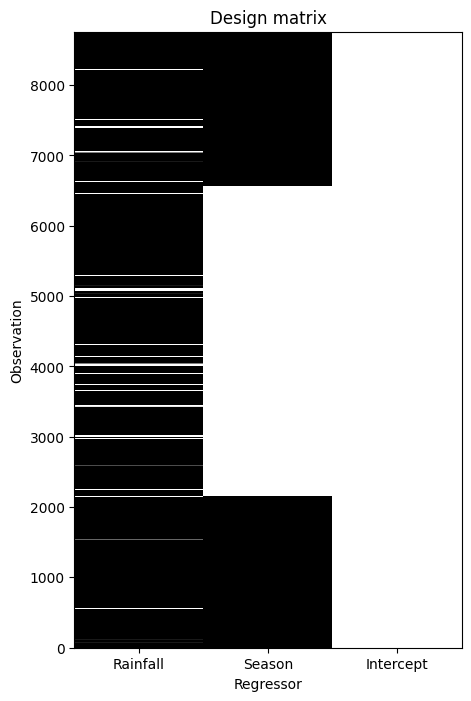

In [9]:
# Create a design matrix
design_mat = df[['Rainfall(mm)','Seasons']].to_numpy()

# add an intercept
design_mat = np.append(design_mat,np.ones((design_mat.shape[0],1)),axis=1)

# extract DV
y = df[['Rented Bike Count']].to_numpy()


# visualize the design matrix
plt.figure(figsize=(5,8))
plt.imshow(design_mat,aspect='auto',vmin=0,vmax=1,origin='lower',interpolation='nearest',cmap='gray')
plt.ylabel('Observation')
plt.xlabel('Regressor')
plt.title('Design matrix')
plt.xticks(range(3),labels=['Rainfall','Season','Intercept'])
plt.show()

Below graph shows  the  data,  plotted  as  rainfall  by  bikes  rented separately  for  the  two  seasons.  Clearly,  the  data  do  not  lie  on  a  line,  because  there are  many  values  at  or  close  to  zero  on  both  axes.  In  other  words,  visually  inspecting the data  suggests  that  the  relationships  amongst  the  variables  are  nonlinear,  which means  that  a  linear  modeling  approach  might  be  sub optimal.  Again,  this  highlightsthe  importance  of  visually  inspecting  data  and  carefully  selecting  an  appropriate statistical model.<br>Nonetheless,  we  will  forge  ahead  using  a  linear  model  fit  to  the  data  using  leastsquares.

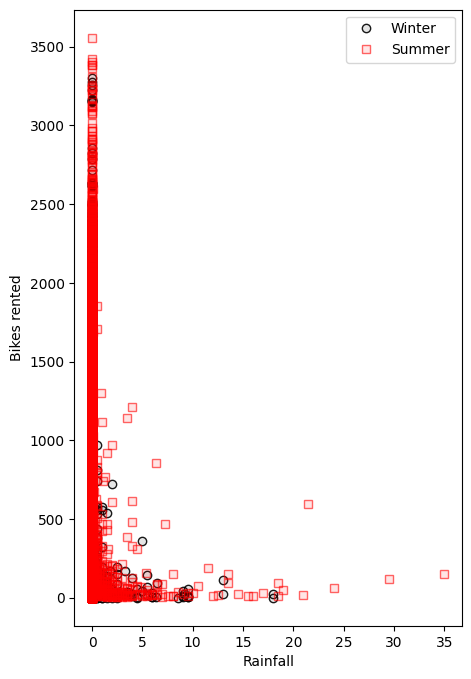

In [10]:
# plot the data
plt.figure(figsize=(5,8))

# separately for autumn/winter and spring/summer
plt.plot(design_mat[design_mat[:,1]==0,0],y[design_mat[:,1]==0],'o',markerfacecolor=(0,0,0,.1),markeredgecolor=(0,0,0,.9),label='Winter')
plt.plot(design_mat[design_mat[:,1]==1,0],y[design_mat[:,1]==1],'s',markerfacecolor=(1,0,0,.1),markeredgecolor=(1,0,0,.6),label='Summer')

plt.xlabel('Rainfall')
plt.ylabel('Bikes rented')
plt.legend()
plt.show()

In [11]:
# run the regression
beta = np.linalg.lstsq(design_mat,y,rcond=None)
beta[0]

array([[-80.52367456],
       [369.12668112],
       [530.49459615]])

The beta values for rainfall and season are, respectively, −80 and 369. These numbers indicate  that  there  are  fewer  bike  rentals  when  it  rains  and  that  there  are  more  bikerentals in the spring/summer compared to autumn/winter.

<a id="negative_bike_pred"></a>

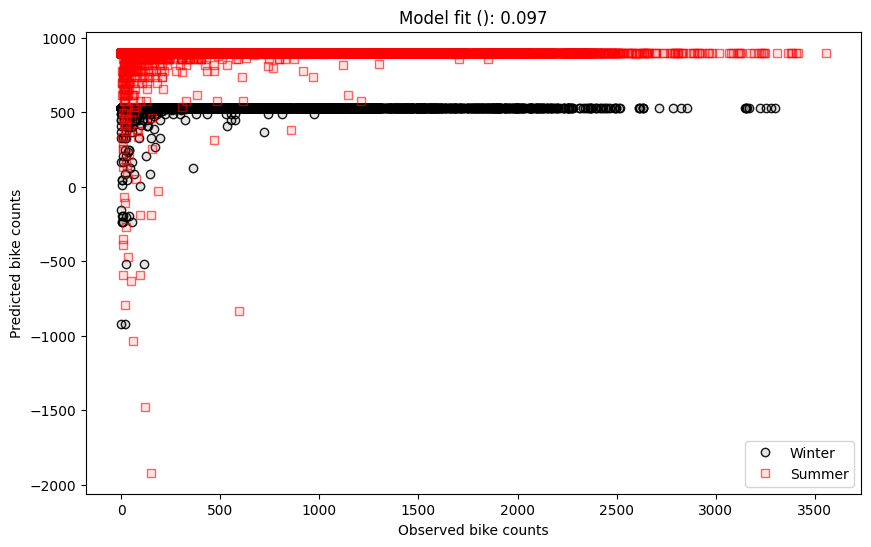

In [12]:
## plot some results.

# predicted data
yHat = design_mat@beta[0]

# model fit to data (R^2)
modelfit = np.corrcoef(y.T,yHat.T)[0,1]**2


# and plot
plt.figure(figsize=(10,6))
plt.plot(y[design_mat[:,1]==0],yHat[design_mat[:,1]==0],'o',markerfacecolor=(0,0,0,.1),markeredgecolor=(0,0,0,.9),label='Winter')
plt.plot(y[design_mat[:,1]==1],yHat[design_mat[:,1]==1],'s',markerfacecolor=(1,0,0,.1),markeredgecolor=(1,0,0,.6),label='Summer')
plt.legend()
plt.xlabel('Observed bike counts')
plt.ylabel('Predicted bike counts')
plt.title(f'Model fit (): {modelfit:.3f}')
plt.show()

The above graph shows  the  predicted  versus  the  observed  data,  separated  for  the  two seasons.  If  the  model  were  a  perfect  fit  to  the  data,  the  dots  would  lie  on  a  diagonal line  with  a  slope  of  1.  Clearly,  that’s  not  the  case,  meaning  that  the  model  did  not fit  the  data  very  well.  Indeed,  the  $R^2$  is  a  paltry  0.097  (in  other  words,  the  statistical model accounts for around 1% of the variance in the data). Futhermore, you can see that  the  model  predicts  negative  bike  rentals,  which  is  not  interpretable bike  rental counts are strictly non negative numbers.<br>
We have received no warnings or errors; we have done nothing wrong in terms of math or coding. However, the statistical model we used is not the most appropriate for this research question.

### Regression Table Using statsmodels
Without  getting  too  deep  into  the  statistics,  I  want  to  show  you  how  to  create a  regression  table  using  the  statsmodels  library.  This  library  works  with  pandas data frames  instead  of  NumPy  arrays.<br>The regression table contains a lot of information. It’s OK if you don’t understand all of it; the key items you can look for are the $R^2$ and the regression coefficients (coef) for the regressors.<br>
The  following  code  shows  how  to  set  up  and compute the regression model (OLS stands for ordinary least squares)

In [13]:
# extract data (staying with pandas dataframes)
design_mat_df  = df[['Rainfall(mm)','Seasons']]
obs_data_df = df['Rented Bike Count']

# create and fit the model
design_mat_df = sm.add_constant(design_mat_df) # must explicitly add an intercept (constant)
model = sm.OLS(obs_data_df,design_mat_df).fit()
print( model.summary() )

                            OLS Regression Results                            
Dep. Variable:      Rented Bike Count   R-squared:                       0.097
Model:                            OLS   Adj. R-squared:                  0.097
Method:                 Least Squares   F-statistic:                     468.8
Date:                Thu, 25 Jul 2024   Prob (F-statistic):          3.80e-194
Time:                        15:22:23   Log-Likelihood:                -68654.
No. Observations:                8760   AIC:                         1.373e+05
Df Residuals:                    8757   BIC:                         1.373e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          530.4946      9.313     56.963   

### Multicollinearity
The  Wikipedia  definition  is  “one  predictor  variable  in  a  multiple  regression  model can be linearly predicted from the others with a substantial degree of accuracy.”
This means that there are linear dependencies in the design matrix. In the parlance oflinear algebra, multicollinearity is just a fancy term for linear dependence, which is the same thing as saying that the design matrix is reduced-rank or that it is singular.<br>A  reduced-rank  design  matrix  does  not  have  a  left-inverse,  which  means  that  the least  squares  problem  cannot  be  solved  analytically.<br>

### Regularization
Regularization  is  an  umbrella  term  that  refers  to  various  ways  of  modifying  a  statistical  model,  with  the  goal  of  improving  numerical  stability,  transforming  singular or ill-conditioned matrices to full-rank (and thus invertible), or improving generalize ability  by  reducing  overfitting.  There  are  several  forms  of  regularization  depending on  the  nature  of  the  problem  and  the  goal  of  regularizing;  some  specific  techniques you  might  have  heard  of  include  Ridge  (a.k.a.  L2),  Lasso  (a.k.a.  L1),  Tikhonov,  and shrinkage.<br>
Different  regularization  techniques  work  in  different  ways,  but  many  regularizers “shift” the design matrix by some amount. You will recall from Chapter 5 that shifting a matrix means adding some constant to the diagonal as A+λI, and from Chapter 6 that shifting a matrix can transform a reduced-rank matrix into a full-rank matrix.<br>
In  this  chapter,  we  will  regularize  the  design  matrix  by  shifting  it  according  to  some proportion  of  its  Frobenius  norm. <br>This  modifies  the  least  squares  solution  Equation 12-1 <br><a id="equation_12_1"></a>
$$
β = (X^TX + γ ||X||^2_F I)^{-1}X^Ty
$$
The  key  parameter  is  γ  (Greek  letter  gamma),  which  determines  the  amount  of regularization  (observe  that  γ= 0  corresponds  to  no  regularization).  Choosing  an appropriate γ parameter is nontrivial, and is often done through statistical techniques like cross-validation.<br>
The most obvious effect of regularization is that if the design matrix is reduced-rank, then the regularized squared design matrix is full-rank. Regularization also decreases the  condition  number,  which  measures  the  “spread”  of  information  in  the  matrix (it’s  the  ratio  of  the  largest  to  the  smallest  singular  value. This increases the numerical stability of the matrix. The statistical implications of regularization is to “smooth out” the solution by reducing the sensitivity of the  model  to  individual  data  points  that  might  be  outliers  or  nonrepresentative,  and therefore less likely to be observed in new datasets.<br>
#### Why  do  I  scale  by  the  squared  Frobenius  norm? 
Consider  that  a  specified  value of  γ,  say,  γ  =  .01,  can  have  a  huge  or  negligible  impact  on  the  design  matrix depending  on  the  range  of  numerical  values  in  the  matrix.  Therefore,  we  scale  to the  numerical  range  of  the  matrix,  which  means  we  interpret  the  γ  parameter  as the  proportion  of  regularization. <br>The  reason  for  squaring  the  Frobenius  norm  is  that $∥X∥_F^2=∥X^TX∥_F$. In other words, the squared norm of the design matrix equals the norm of the design matrix times its transpose. It’s actually more common to use the average of the eigenvalues of the design matrix instead of the Frobenius norm.

## Polynomial Regression
A polynomial regression is like a normal regression but the independent variables are the x-axis values raised to higher powers. That is, each column i of the design matrix is  defined  as  $x^i$,  where  x  is  typically  time  or  space  but  can  be  other  variables  such  as medication dosage or population. The mathematical model looks like this: <br>$$y = β_0x^0 + β_1x^1 +  . . .  + β_nx^n$$<br>
Note  that  $x^0= 1$,  giving  us  the  intercept  of  the  model.  Otherwise,  it’s  still  a  regular regression the  goal  is  to  find  the  β  values  that  minimize  the  squared  differences between the predicted and observed data. The  order  of  the  polynomial  is  the  largest  power  i.  For  example,  a  fourth-order polynomial regression has terms up to $x^4$ (if there is no $x^3$ term, then it’s still a fourth-order model with $β_3=0$<br>

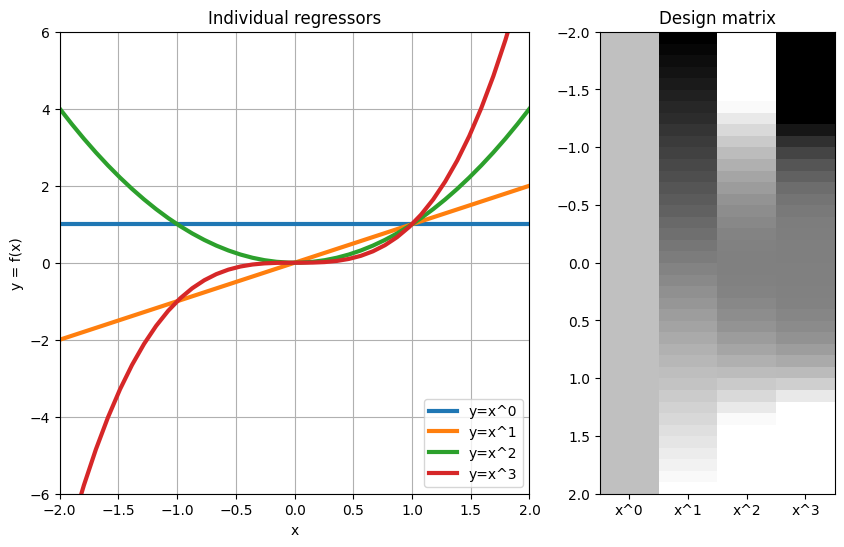

In [14]:
x = np.linspace(-2,2,40)
maxorder = 3
design_mat = np.zeros((len(x),maxorder+1))
xlab = []


_,axs = plt.subplots(1,2,gridspec_kw={'width_ratios':[2,1]}, figsize=(10,6))

for i in range(maxorder+1):
  axs[0].plot(x,x**i,linewidth=3,label='y=x^%g'%i)
  design_mat[:,i] = x**i
  xlab.append( 'x^%g'%i )

axs[0].set(xlim=[-2,2],xlabel='x')
axs[0].set(ylim=[-6,6],ylabel='y = f(x)')
axs[0].grid()
axs[0].legend()
axs[0].set_title('Individual regressors')

# draw the design matrix
axs[1].imshow(design_mat,cmap='gray',aspect='auto',vmin=-2,vmax=2,extent=[-.5,maxorder+.5,x[-1],x[0]])
axs[1].set(xticks=range(maxorder+1),xticklabels=xlab)
axs[1].set_title('Design matrix')

plt.show()

The above graphs hows  an  example  of  the  individual  regressors  and  the  design  matrix of  a  third  order  polynomial  (keep  in  mind  that  an  $n^{th}$  order  polynomial  has  n  +  1 regressors including the intercept). The polynomial functions are the basis vectors for modeling the observed data.<br>
Other  than  the  special  design  matrix,  a  polynomial  regression  is  exactly  the  same as  any  other  regression:  use  the  left-inverse  (or  more  computationally  stable  alternatives)  to  obtain  the  set  of  coefficients  such  that  the  weighted  combination  of regressors (i.e., the predicted data) best matches the observed data.<br>
Polynomial  regressions  are  used  in  curve  fitting  and  in  approximating  non-linear functions.  Applications  include  time  series  modeling,  population  dynamics,  dose-response  functions  in  medical  research,  and  physical  stresses  on  structural  support beams.  Polynomials  can  also  be  expressed  in  2D,  which  are  used  to  model  spatial structure such as earthquake propagation and brain activity.

### Example
Let’s  work  through  an  example.  The  dataset  I  picked  is  from  a model of human population doubling. The question is “How long does it take for the population  of  humanity  to  double  (e.g.,  from  five  hundred  million  to  one  billion)?”<br>
dataset = "https://ourworldindata.org/world-population-growth"<br>
This dataset includes both actual measured data and projections to  the year 2100. These projections into the future are based on a number  of    assumptions,  and  no  one  really  knows  how  the  future  will  play  out  (that’s why  you  should  find  a  balance  between  preparing  for  the  future  and  enjoying  the moment). Regardless, the data thus far shows that the human population doubled with increasing frequency over the past five hundred years (at least), and the authors of   the dataset predict that the doubling rate will increase slightly over the next century.

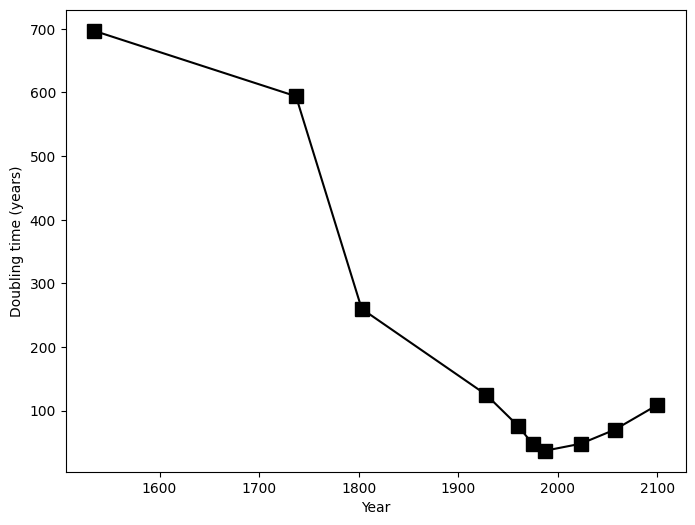

In [15]:
# the data
year       = [1534, 1737, 1803, 1928, 1960, 1975, 1987, 2023, 2057, 2100 ]
doubleTime = [ 697,  594,  260,  125,   76,   47,   37,   48,   70,  109 ]

N = len(year)


# plot it
plt.figure(figsize=(8,6))
plt.plot(year,doubleTime,'ks-',markersize=10)

plt.xlabel('Year')
plt.ylabel('Doubling time (years)')
plt.show()

## DATA CITATION: 
#    Max Roser, Hannah Ritchie and Esteban Ortiz-Ospina (2013) - "World Population Growth".
#    Published online at OurWorldInData.org. Retrieved from: 'https://ourworldindata.org/world-population-growth'
#    https://ourworldindata.org/uploads/2019/12/World-population-doubling-time-1.png

#### Chosing  a  third  order  polynomial  to  fit  the  data,  and  created  and  fit  the  model using  the  following  code  (variable  year  contains  the  x-axis  coordinates  and  variable double Time contains the dependent variable):

In [16]:
# design matrix for a 3rd-order polynomial
X = np.zeros((N,4))

# build the design matrix (note the range "4" because of indexing 0-3)
for i in range(4): 
  X[:,i] = np.array(year)**i


# converted to ints for your viewing pleasure
print(X.astype(int))

[[         1       1534    2353156 3609741304]
 [         1       1737    3017169 5240822553]
 [         1       1803    3250809 5861208627]
 [         1       1928    3717184 7166730752]
 [         1       1960    3841600 7529536000]
 [         1       1975    3900625 7703734375]
 [         1       1987    3948169 7845011803]
 [         1       2023    4092529 8279186167]
 [         1       2057    4231249 8703679193]
 [         1       2100    4410000 9261000000]]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


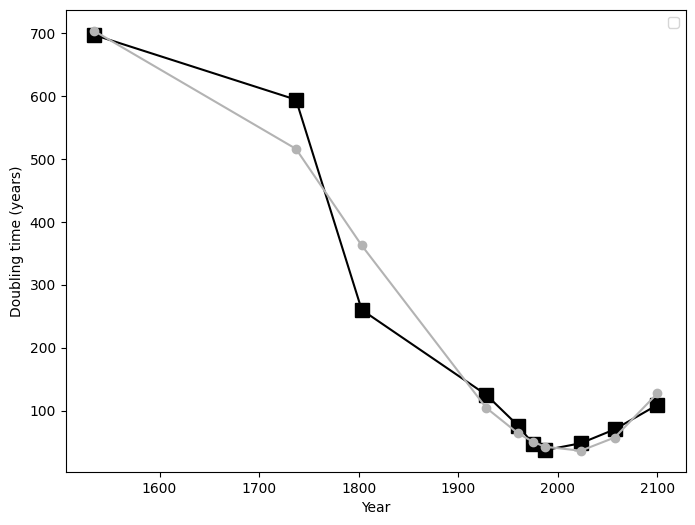

In [17]:
# compute the regression coefficients
beta = np.linalg.lstsq(X,doubleTime, rcond=None)

# and the predicted data
yHat = X@beta[0]


# plot it
plt.figure(figsize=(8,6))
plt.plot(year,doubleTime,'ks-',markersize=10,label=r'')
plt.plot(year,yHat,'o-',color=[.7,.7,.7],label=r'')

plt.legend()
plt.xlabel('Year')
plt.ylabel('Doubling time (years)')
plt.show()

#### Above graph shows the predicted data using the polynomial regression
The  model  captures  both  the  downward  trend  and  the  projected  upswing  in  the data. Without further statistical analysis, we cannot say that this is the best model or that  the  model  is  a  statistically  significantly  good  fit  to  the  data.  But  it  is  clear  that polynomial regressions are well suited for fitting curves.<br>Polynomial  regressions  are  commonly  used,  and  NumPy  has  dedicated  functions  to create and fit such models:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


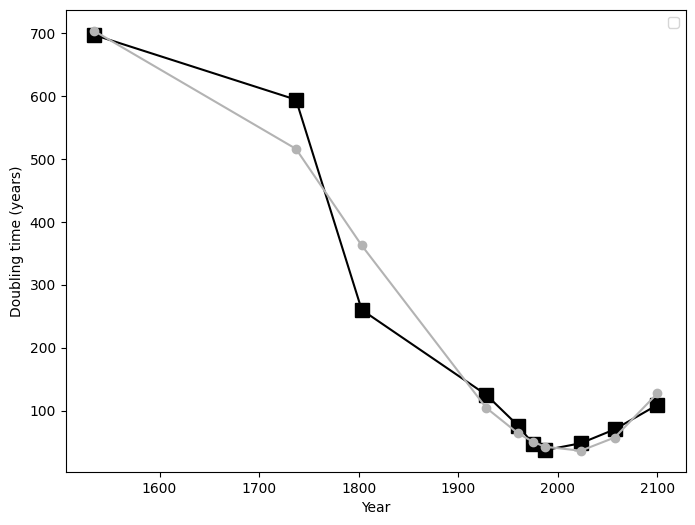

In [18]:
beta = np.polyfit(year,doubleTime,3) # 3rd order
yHat = np.polyval(beta,year)
#plot it
plt.figure(figsize=(8,6))
plt.plot(year,doubleTime,'ks-',markersize=10,label=r'')
plt.plot(year,yHat,'o-',color=[.7,.7,.7],label=r'')

plt.legend()
plt.xlabel('Year')
plt.ylabel('Doubling time (years)')
plt.show()

### Grid Search to Find Model Parameters
Least squares via the left-inverse is a brilliant way to fit models to data. Least squares is accurate, fast, and deterministic (meaning that each time you rerun the code, you’llget the same result). But it works only for linear model fitting, and not all models can be fit using linear methods.<br>
A grid search works by sampling the parameter  space,  computing  the  model  fit  to  the  data  with  each  parameter  value,  and  then selecting the parameter value that gave the best model fit.The  range  and  the  resolution  (the  spacing  between  grid points)  are  important,  because  they  determine  whether  you  will  obtain  the  best solution,  a  pretty  good  solution,  or  an  awful  solution. <br>


## Code Exercises

### Question 12-1. Perhaps part of the problem with negative bike rentals in [This Graph](#negative_bike_pred) can be alleviated by  eliminating  the  no-rainfall  days.  Repeat  the  analysis  and  graph  for  this  analysis, but select only the data rows that have zero rainfall. Do the results improve, in terms of higher R2 and positive predicted rental counts?

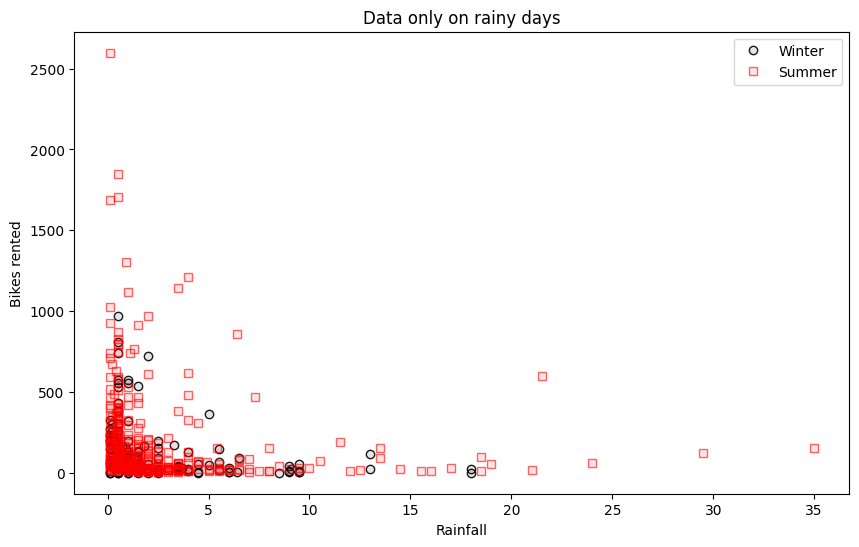

In [19]:
# re-create design matrix and data vector
desmat = df[['Rainfall(mm)','Seasons']].to_numpy()
desmat = np.append(desmat,np.ones((desmat.shape[0],1)),axis=1)
y = df[['Rented Bike Count']].to_numpy()

# repeat excluding zeros in rainfall

desmat_norain = desmat[desmat[:,0]>0,:]
y_norain = y[desmat[:,0]>0,:]

# plot the data
plt.figure(figsize=(10,6))

# separately for autumn/winter and spring/summer
plt.plot(desmat_norain[desmat_norain[:,1]==0,0],y_norain[desmat_norain[:,1]==0],'o',
         markerfacecolor=(0,0,0,.1),markeredgecolor=(0,0,0,.9),label='Winter')
plt.plot(desmat_norain[desmat_norain[:,1]==1,0],y_norain[desmat_norain[:,1]==1],'s',
         markerfacecolor=(1,0,0,.1),markeredgecolor=(1,0,0,.6),label='Summer')

plt.xlabel('Rainfall')
plt.ylabel('Bikes rented')
plt.title('Data only on rainy days')
plt.legend()
plt.show()

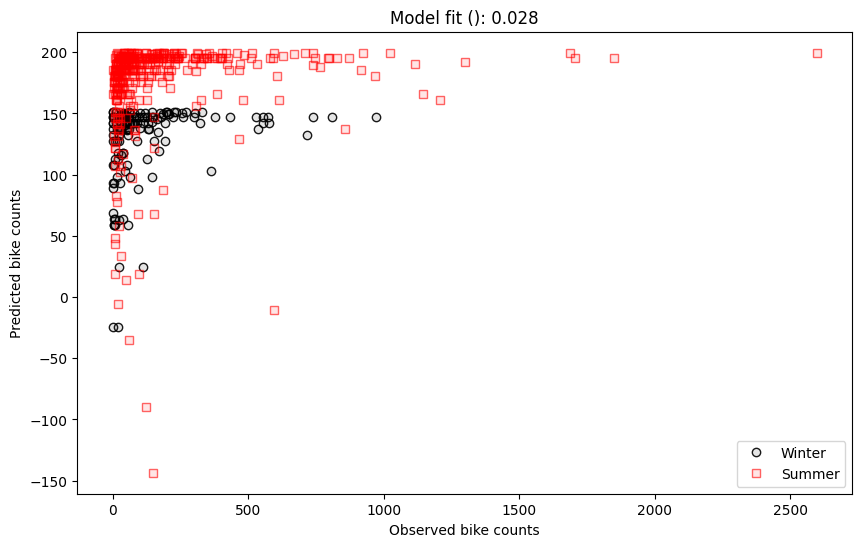

In [20]:
# run the regression (using np's least-squares)
beta_norain = np.linalg.lstsq(desmat_norain,y_norain,rcond=None)


# predicted data
yHat_norain = desmat_norain @ beta_norain[0]

# model fit to data (R^2)
modelfit = np.corrcoef(y_norain.T,yHat_norain.T)[0,1]**2



## plot some results.
plt.figure(figsize=(10,6))
plt.plot(y_norain[desmat_norain[:,1]==0],yHat_norain[desmat_norain[:,1]==0],'o',
         markerfacecolor=(0,0,0,.1),markeredgecolor=(0,0,0,.9),label='Winter')
plt.plot(y_norain[desmat_norain[:,1]==1],yHat_norain[desmat_norain[:,1]==1],'s',
         markerfacecolor=(1,0,0,.1),markeredgecolor=(1,0,0,.6),label='Summer')

plt.legend()
plt.xlabel('Observed bike counts')
plt.ylabel('Predicted bike counts')
plt.title(f'Model fit (): {modelfit:.3f}')
plt.show()

### Question 12-2.Because seasons is a categorical variable, an ANOVA would actully be a more appropriate  statistical  model  than  a  regression.  Maybe  the  binarized  seasons  lacks  the sensitivity  to  predict  bike  rentals  (for  example,  there  can  be  warm  sunny  days  in autumn  and  cold  rainy  days  in  spring),  and  therefore  temperature  might  be  a  better predictor.Replace seasons with temperature in the design matrix and rerun the regression (you can  use  all  days,  not  only  the  no-rainfall  days  from  the  previous  exercise),  and reproduce Figure 12-9. There is still the issue with predicting negative rentals (this is because of the linearity of the model), but the $R^2$ is higher and the prediction appear squalitatively better.
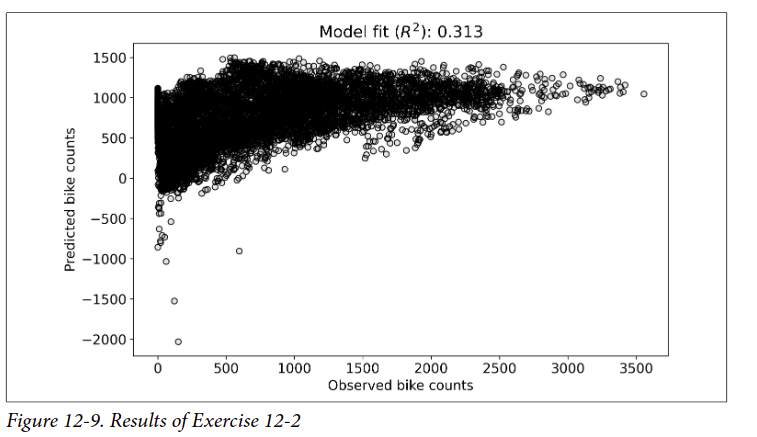

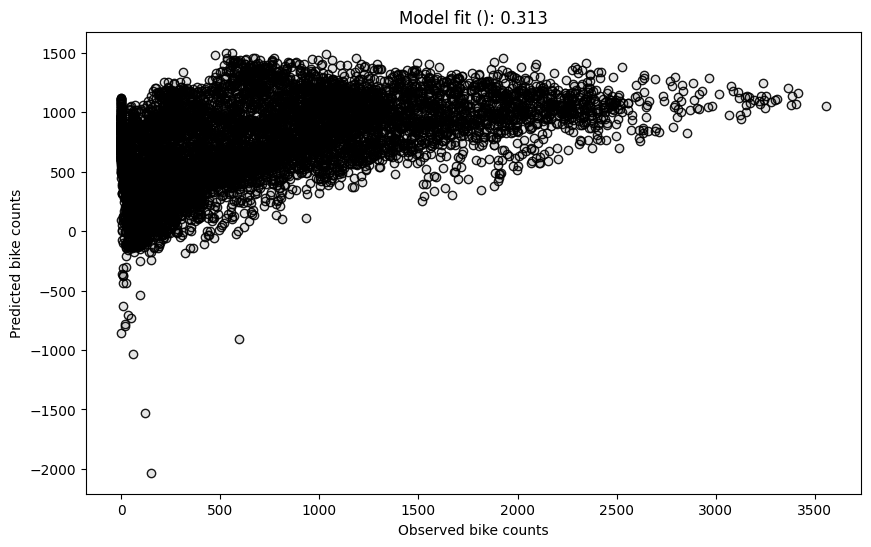

In [21]:
# Create a design matrix
desmat = df[['Rainfall(mm)','Temperature(°C)']].to_numpy()
desmat = np.append(desmat,np.ones((desmat.shape[0],1)),axis=1)


beta = np.linalg.lstsq(desmat,y,rcond=None)
yHat = desmat@beta[0]

# model fit to data (R^2)
modelfit = np.corrcoef(y.T,yHat.T)[0,1]**2

# and plot
plt.figure(figsize=(10,6))
plt.plot(y,yHat,'o',markerfacecolor=(0,0,0,.1),markeredgecolor=(0,0,0,.9))
plt.xlabel('Observed bike counts')
plt.ylabel('Predicted bike counts')
plt.title(f'Model fit (): {modelfit:.3f}')
plt.show()

### Question 12-3.This  exercise  continues  with  the  model  from  Exercise  12-2. This  model  contains three  regressors,  including  the  intercept.  Create  a  new  design  matrix  that  contains a  fourth  regressor  defined  as  some  linear  weighted  combination  of  temperature  and rainfall. Give this design matrix a different variable name, because you will need it in the  next  exercise.  Confirm  that  the  design  matrix  has  four  columns  yet  a  rank  of  3,and compute the correlation matrix of the design matrix.<br>Note  that  depending  on  the  weightings  of  the  two  variables,  you  wouldn’t  expect  a correlation of 1 even with linear dependencies.<br>Fit the model using three different coding approaches: (1) the direct implementation with  the  left-inverse  as  you  learned  in  the  previous  chapter,  (2)  using  NumPy’s lstsqr function, and (3) using statsmodels. For all three methods, compute $R^2$ and the  regression  coefficients.  Print  the  results  as  follows.  The  numerical  instability  of np.linalg.inv on a reduced-rank design matrix is apparent.<br>


In [22]:
# some random linear combination
lincombo = 4*desmat[:,0] + .4*desmat[:,1]

# Create a design matrix
desmatM = df[['Rainfall(mm)','Temperature(°C)']].to_numpy()
desmatM = np.append(desmatM,np.ones((desmatM.shape[0],1)),axis=1)

# augmented design matrix
desmatM = np.append(desmatM,lincombo.reshape(-1,1),axis=1)

# size and rank of the design matrix
print(f'Design matrix size: {desmatM.shape}')
print(f'Design matrix rank: {np.linalg.matrix_rank(desmatM)}')

# correlation matrix (note: nan's for intercept b/c no variance)
oSettings = np.seterr() # default error handling
np.seterr(all='ignore') # ignore warnings for correlation matrices
print(f'\nDesign matrix correlation matrix:')
print(np.round(np.corrcoef(desmatM.T),5))
np.seterr(**oSettings); # reset the error handling

Design matrix size: (8760, 4)
Design matrix rank: 3

Design matrix correlation matrix:
[[1.      0.05028     nan 0.7057 ]
 [0.05028 1.          nan 0.74309]
 [    nan     nan     nan     nan]
 [0.7057  0.74309     nan 1.     ]]


In [23]:
#A nicer way to print out the correlation matrix using pandas
pd.DataFrame(desmatM,columns=['Rain','Temp','Int','Combo']).corr()

,Rain,Temp,Int,Combo
Rain,1.000000,0.050282,NaN,0.705704
Temp,0.050282,1.000000,NaN,0.743094
Int,NaN,NaN,NaN,NaN
Combo,0.705704,0.743094,NaN,1.000000


In [24]:

### using left-inverse

# fit the model using the left-inverse
X_leftinv = np.linalg.inv(desmatM.T@desmatM) @ desmatM.T
# FYI, numpy knowingly "inverts" a singular matrix if it's within precision: https://github.com/numpy/numpy/issues/2074

# solve for the coefficients and compute R^2
beta1 = X_leftinv @ y
yHat  = desmatM@beta1

# model fit to data (R^2)
modelfit1 = np.corrcoef(y.T,yHat.T)[0,1]**2
print(modelfit1)

0.10306927861230561


In [25]:
### using numpy's least-squares

# fit the model
beta2 = np.linalg.lstsq(desmatM,y,rcond=None)
yHat  = desmatM@beta2[0]

# model fit to data (R^2)
modelfit2 = np.corrcoef(y.T,yHat.T)[0,1]**2
print(modelfit2)

0.3126481542486897


In [26]:
### using statsmodels

# convert the design matrix into a pandas dataframe
desmat_df = pd.DataFrame(desmatM)
obsdata_df = df['Rented Bike Count']
# create and fit the model
desmat_df = sm.add_constant(desmat_df)
model = sm.OLS(obsdata_df,desmat_df).fit()


beta3 = model.params.values
modelfit3 = model.rsquared
print(modelfit3)

0.3126481542486902


In [27]:
# print all to compare

print('MODEL FIT TO DATA:')
print(f'  Left-inverse: {modelfit1:.4f}')
print(f'  np lstsqr   : {modelfit2:.4f}')
print(f'  statsmodels : {modelfit3:.4f}')

print(' ')
print('BETA COEFFICIENTS:')
print(f'  Left-inverse: {np.round(beta1.T,3)}')
print(f'  np lstsqr   : {np.round(beta2[0].T,3)}')
print(f'  statsmodels : {np.round(beta3.T,3)}')

MODEL FIT TO DATA:
  Left-inverse: 0.1031
  np lstsqr   : 0.3126
  statsmodels : 0.3126
 
BETA COEFFICIENTS:
  Left-inverse: [[-1.67070e+03 -1.12200e+00  3.37483e+02  1.17151e+02]]
  np lstsqr   : [[ -8.567  37.239 337.483 -19.374]]
  statsmodels : [ -8.567  37.239 337.483 -19.374]


### Question 12-4. Here  you  will  explore  the  effects  of  regularization  on  the  reduced-rank  design matrix    that    you    created    in    the    previous    exercise.    Start    by    implementing $ (X^TX+γ∥X∥^2_FI)^{−1}$ ,  using  γ= 0  and  γ= .01.  Print  out  the  size  and  rank  of  the two matrices. The  goal  here  is  to  explore  the  effects  of  regularization  on the  fit  of  the  model  to  the  data.  Write  code  that  will  compute  the  fit  to  the  data  as $R^2$  using  least  squares  with  regularization  on  the  design  matrices  with  and  without multicollinearity.  Put  that  code  into  a  for  loop  that  implements  a  range  of  γ  values between 0 and .2. Then show the results in a figure like Figure 12-10.<br>By  the  way,  it  is  trivial  that  the  model  fit  decreases  with  increasing  regularization for  full-rank  design  matrices—indeed,  the  purpose  of  regularization  is  to  make  the model  less  sensitive  to  the  data.  The  important  question  is  whether  regularization improves the fit to a test dataset or validation fold that was excluded when fitting the model. If the regularization is beneficial, you would expect the generalizability of the regularized model to increase up to some γ and then decrease again. <br>
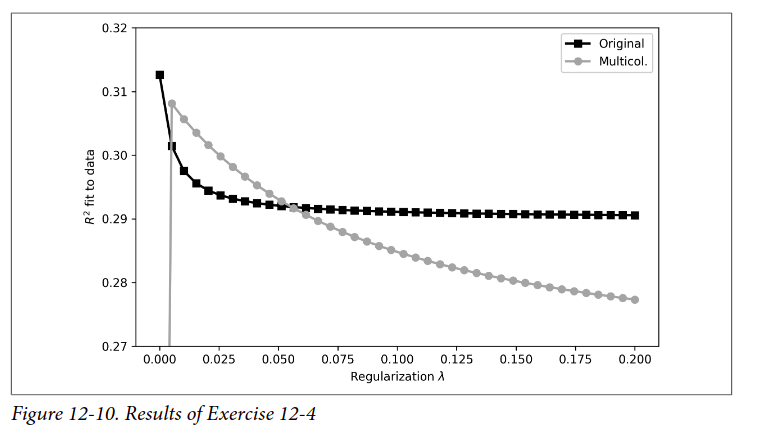

In [28]:
# regularization proportion
gamma = .01

# gamma times the norm
gamnorm = gamma * np.linalg.norm(desmatM,'fro')**2

# inverse of (X'X+lI)
leftinv = np.linalg.inv(desmatM.T@desmatM + gamnorm*np.eye(desmatM.shape[1]))

# print results
print(f"inv(X'X + {gamma}*I) size: {leftinv.shape}")
print(f"inv(X'X + {gamma}*I) rank: {np.linalg.matrix_rank(leftinv)}")

inv(X'X + 0.01*I) size: (4, 4)
inv(X'X + 0.01*I) rank: 4


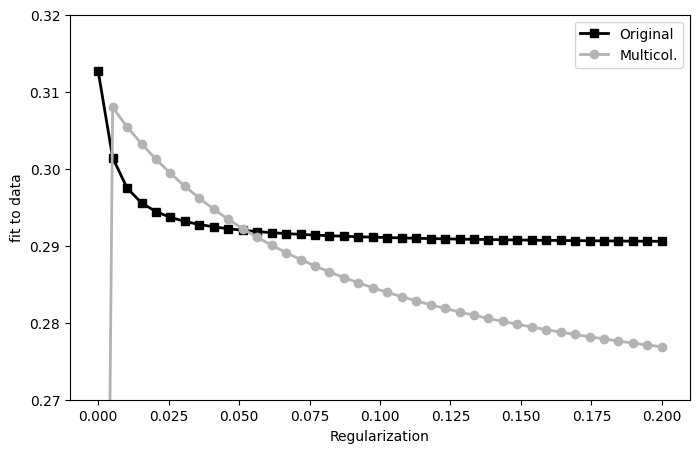

In [29]:
### Note about this code:
# Exercise 7 of chapter 13 relies on this code. Use the following toggle when you're on chapter 13 :)
I_am_reading_chapter_13 = False


# range of gamma parameters
gs = np.linspace(0,.2,40)

# initialize r2 vector
r2s  = np.zeros(gs.shape)
r2sM = np.zeros(gs.shape) # the 'M' is for multicollinearity


# loop over gammas
for i in range(len(gs)):

  # create lambda
  l = gs[i]*np.linalg.norm(desmat,'fro')**2

  if I_am_reading_chapter_13: # exercise 13.7
    l = gs[i]*np.mean(np.linalg.eig(desmat.T@desmat)[0])

  # compute left-inverse
  leftinv = np.linalg.inv(desmat.T@desmat + l*np.eye(desmat.shape[1])) @ desmat.T
  
  # compute beta and predicted data
  b = leftinv @ y
  yHat = desmat@b

  # model fit to data
  r2s[i] = np.corrcoef(y.T,yHat.T)[0,1]**2


  ### repeat for the multicollinear model (condensed for convenience)
  l       = gs[i]*np.linalg.norm(desmatM,'fro')**2
  if I_am_reading_chapter_13: # exercise 13.6
    l     = gs[i]*np.mean(np.linalg.eig(desmatM.T@desmatM)[0])
  leftinv = np.linalg.inv(desmatM.T@desmatM + l*np.eye(desmatM.shape[1])) @ desmatM.T
  b       = leftinv @ y
  yHat    = desmatM@b
  r2sM[i] = np.corrcoef(y.T,yHat.T)[0,1]**2



# plot the results
plt.figure(figsize=(8,5))
plt.plot(gs,r2s,'ks-',linewidth=2,label='Original')
plt.plot(gs,r2sM,'o-',linewidth=2,label='Multicol.',color=[.7,.7,.7])
plt.xlabel('Regularization')
plt.ylabel('fit to data')
plt.ylim([.27,.32])
plt.legend()
plt.show()

### Question 12-5. The  purpose  of  this  exercise  is  to  fit  the  polynomial  regression  using  a  range  of orders, from zero to nine. In a for loop, re compute the regression and the predicted data values. Show the results like in Figure 12-11. This exercise highlights the problems with underfitting and overfitting. The model with too  few  parameters  does  a  poor  job  at    predicting  the  data.  On  the  other  hand,  the model  with  many  parameters  fits  the  data too  well  and  risks  being  overly  sensitive  to noise and  failing  to   generalize  to   new  data.  Strategies  for  finding  the  balance  between under-  and  overfitting  include  cross-validation  and  Bayes  information  criterion;  the seare topics that you would learn about in a machine learning or statistics book.<br>
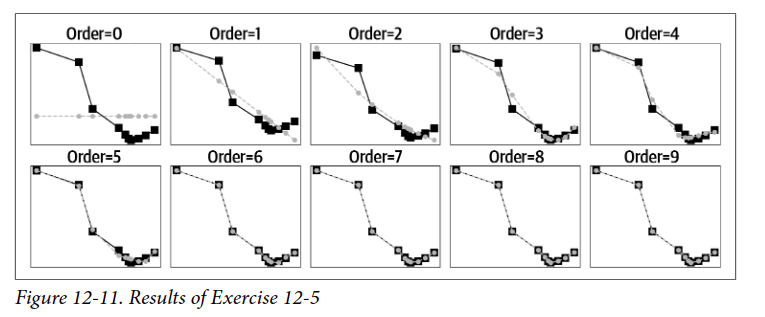

/home/aditya/env/gpt/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3508: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


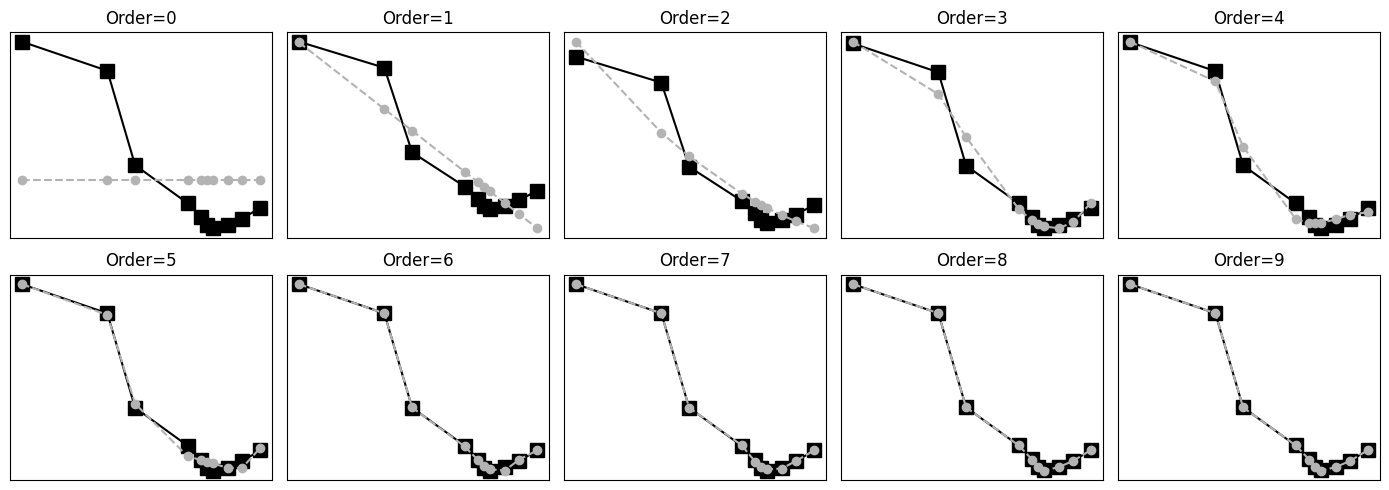

In [30]:
# plot it
_,axs = plt.subplots(2,5,figsize=(14,5))
axs = axs.flatten()


for oi in range(N):
  beta = np.polyfit(year,doubleTime,oi)
  yHat = np.polyval(beta,year)

  # plot
  axs[oi].plot(year,doubleTime,'ks-',markersize=10)
  axs[oi].plot(year,yHat,'o--',color=[.7,.7,.7])
  axs[oi].set(xticks=[], yticks=[])
  axs[oi].set_title('Order=%g' %oi)

plt.tight_layout()
plt.show()

### Question 2-6.Your goal here is simple: reproduce Figure 12-8 following the instructions presentedin  the  text  around  that  figure.  Print  out  the  regression  coefficients  to  compare. <br>
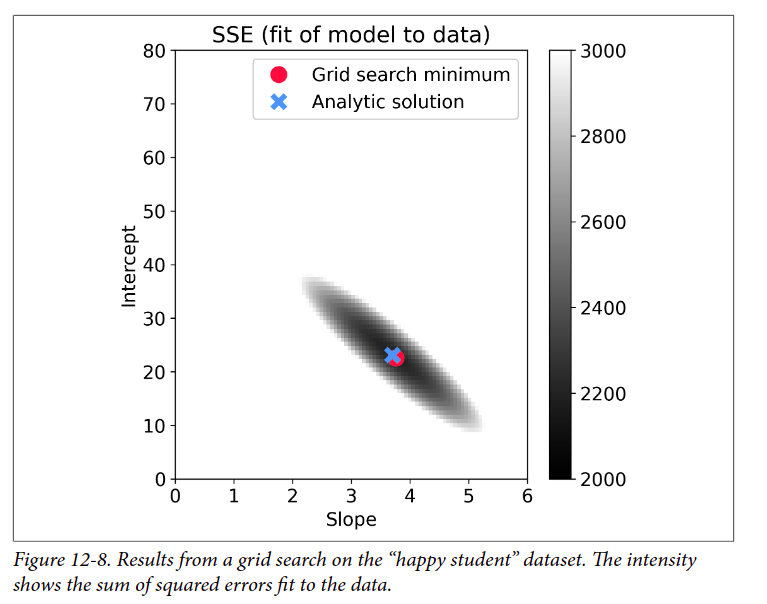

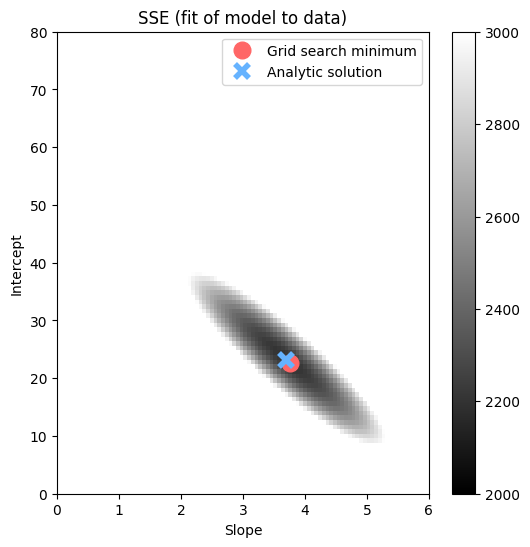

Analytic result: 
   Intercept: 23.13, slope: 3.70
 
Empirical result: 
   Intercept: 22.63, slope: 3.76


In [31]:
# NOTE: data and model from the previous chapter
numcourses = [13,4,12,3,14,13,12,9,11,7,13,11,9,2,5,7,10,0,9,7]
happiness  = [70,25,54,21,80,68,84,62,57,40,60,64,45,38,51,52,58,21,75,70]

# design matrix
X = np.hstack((np.ones((20,1)),np.array(numcourses,ndmin=2).T))
beta = np.linalg.lstsq(X,happiness,rcond=None)[0]
# the number of steps for each parameter
gridResolution = 100


# specify intercepts and slopes to test
intercepts = np.linspace(0,80,gridResolution)
slopes = np.linspace(0,6,gridResolution)

# initialize output matrix
SSEs = np.zeros((len(intercepts),len(slopes)))


# for-loops over parameters
for inti in range(len(intercepts)):
  for slopei in range(len(slopes)):

    # model-predicted data
    yHat = X @ np.array([intercepts[inti],slopes[slopei]]).T

    # sum of squared errors
    SSEs[inti,slopei] = np.sum((yHat-happiness)**2)


# find empirical minimum
i,j = np.unravel_index( np.argmin(SSEs),SSEs.shape )
empIntercept,empSlope = intercepts[i], slopes[j]


# plot the error landscape with empirical minimum
plt.figure(figsize=(6,6))
plt.imshow(SSEs,vmin=2000,vmax=3000,
           extent=[slopes[0],slopes[-1],intercepts[0],intercepts[-1]],
           origin='lower',aspect='auto',cmap='gray')
plt.plot(empSlope,empIntercept,'o',color=[1,.4,.4],markersize=12,label='Grid search minimum')
plt.plot(beta[1],beta[0],'x',color=[.4,.7,1],markeredgewidth=4,markersize=10,label='Analytic solution')
plt.colorbar()
plt.xlabel('Slope')
plt.ylabel('Intercept')
plt.title('SSE (fit of model to data)')
plt.legend()
plt.show()

# print out the results
print('Analytic result: ')
print(f'   Intercept: {beta[0]:.2f}, slope: {beta[1]:.2f}')
print(' ')
print('Empirical result: ')
print(f'   Intercept: {empIntercept:.2f}, slope: {empSlope:.2f}')


### Question 12-7.You have seen two different methods for evaluating the fit of a model to data: sum of squared  errors  and  $R^2$.  In  the  previous  exercise,  you  used  the  sum  of  squared  errors to  evaluate  the  model  fit  to  data;  in  this  exercise,  you  will  determine  whether  $R^2$  is equally viable.The coding part of this exercise is simple: modify the code from the previous exerciseto  compute  $R^2$  instead  of  SSE  (make  sure  to  modify  a  copy  of  the  code  instead  ofoverwriting the previous exercise).<br>Now  for  the  challenging  part:  you  will  find  that  $R^2$  is  terrible!  It  gives  a  completely wrong answer. Your job is to figure out why that is (the online code solution containsa discussion on this point). Hint: store the predicted data from each parameter pair so you can inspect the predicted values, and then compare against the observed data

/home/aditya/env/gpt/lib/python3.8/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/aditya/env/gpt/lib/python3.8/site-packages/numpy/lib/function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


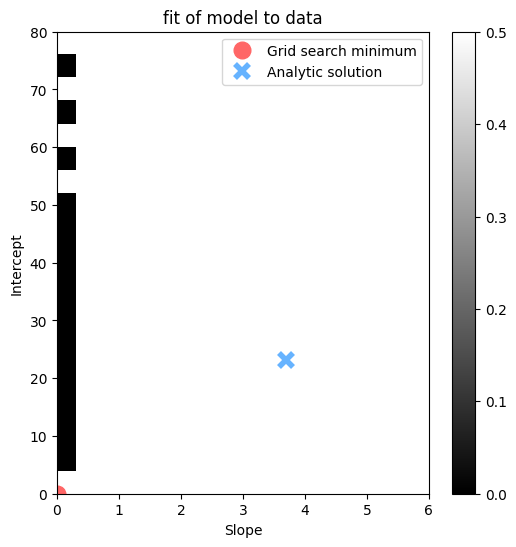

Analytic result: 
   Intercept: 23.13, slope: 3.70
 
Empirical result: 
   Intercept: 0.00, slope: 0.00


In [32]:
# the number of steps for each parameter
gridResolution = 20


# specify intercepts and slopes to test
intercepts = np.linspace(0,80,gridResolution)
slopes = np.linspace(0,6,gridResolution)

# initialize output matrix
r2 = np.zeros((len(intercepts),len(slopes)))
allYhat = np.zeros((len(intercepts),len(slopes),len(happiness)))

# for-loops over parameters
for inti in range(len(intercepts)):
  for slopei in range(len(slopes)):

    # model-predicted data
    yHat = X @ np.array([intercepts[inti],slopes[slopei]]).T

    # R2 model fit
    r2[inti,slopei] = np.corrcoef(yHat,happiness)[0,1]**2
    
    # store all predicted data values
    allYhat[inti,slopei,:] = yHat


# find empirical minimum
i,j = np.unravel_index( np.argmax(r2),r2.shape )
empIntercept,empSlope = intercepts[i], slopes[j]


# plot the error landscape with empirical minimum
plt.figure(figsize=(6,6))
plt.imshow(r2,vmin=0,vmax=.5,
           extent=[slopes[0],slopes[-1],intercepts[0],intercepts[-1]],
           origin='lower',aspect='auto',cmap='gray')
plt.plot(empSlope,empIntercept,'o',color=[1,.4,.4],markersize=12,label='Grid search minimum')
plt.plot(beta[1],beta[0],'x',color=[.4,.7,1],markeredgewidth=4,markersize=10,label='Analytic solution')
plt.colorbar()
plt.xlabel('Slope')
plt.ylabel('Intercept')
plt.title('fit of model to data')
plt.legend()
plt.show()

# print out the results
print('Analytic result: ')
print(f'   Intercept: {beta[0]:.2f}, slope: {beta[1]:.2f}')
print(' ')
print('Empirical result: ')
print(f'   Intercept: {empIntercept:.2f}, slope: {empSlope:.2f}')


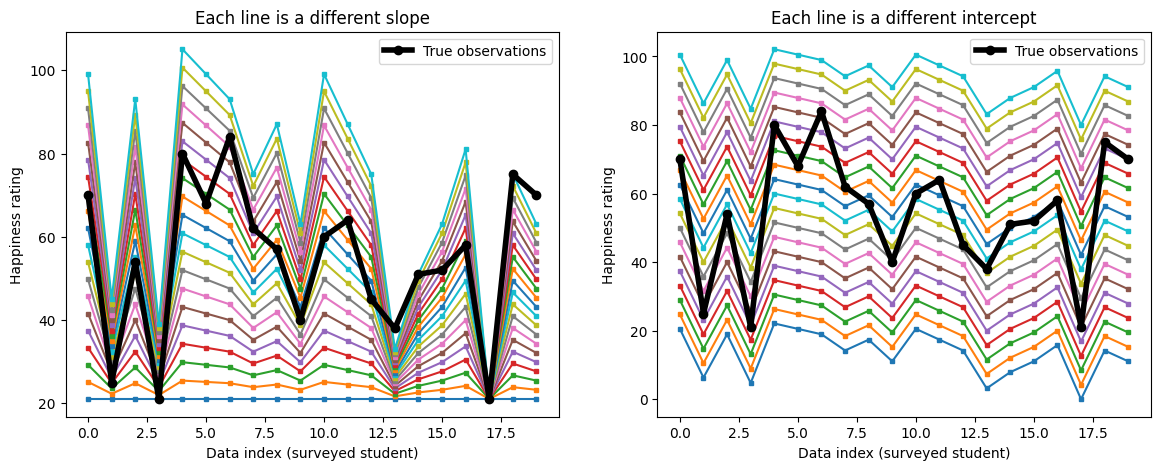

In [33]:

_,axs = plt.subplots(1,2,figsize=(14,5))

axs[0].plot(allYhat[5,:,:].T,'s-',markersize=3)
axs[0].plot(happiness,'ko-',linewidth=4,label='True observations')
axs[0].set_xlabel('Data index (surveyed student)')
axs[0].set_ylabel('Happiness rating')
axs[0].set_title('Each line is a different slope')
axs[0].legend()

axs[1].plot(allYhat[:,5,:].T,'s-',markersize=3)
axs[1].plot(happiness,'ko-',linewidth=4,label='True observations')
axs[1].set_xlabel('Data index (surveyed student)')
axs[1].set_ylabel('Happiness rating')
axs[1].set_title('Each line is a different intercept')
axs[1].legend()

plt.show()

# The plots show that the predicted values are quite similar for different parameter pairs.
# Recall that data are mean-centered in the correlation formula. In fact, we can re-plot these
# predicted data after mean-centering, i.e., the way a correlation would see the data. 

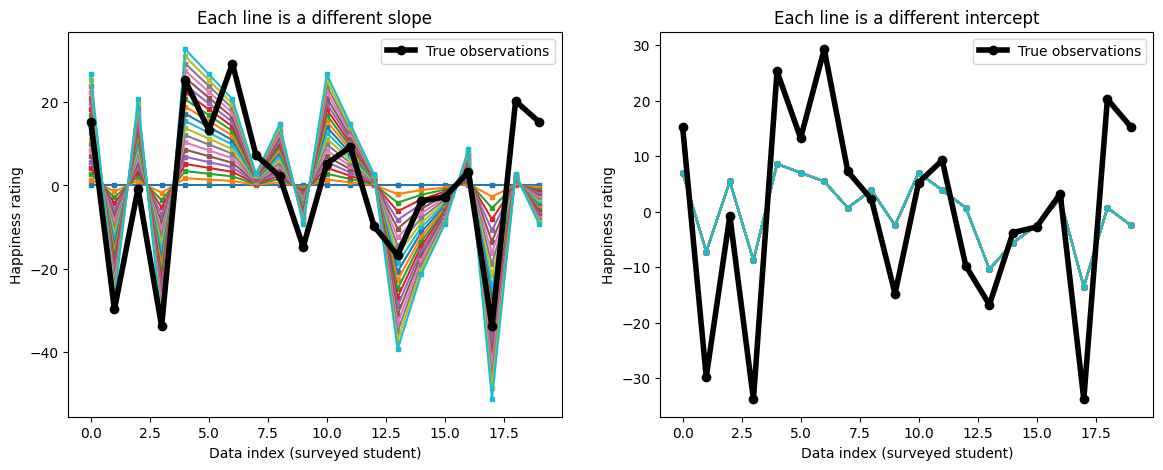

In [34]:
# The plots here are the same as above, but all data have been mean-centered.

_,axs = plt.subplots(1,2,figsize=(14,5))

axs[0].plot(allYhat[5,:,:].T - np.mean(allYhat[5,:,:].T,axis=0),'s-',markersize=3)
axs[0].plot(happiness-np.mean(happiness),'ko-',linewidth=4,label='True observations')
axs[0].set_xlabel('Data index (surveyed student)')
axs[0].set_ylabel('Happiness rating')
axs[0].set_title('Each line is a different slope')
axs[0].legend()

axs[1].plot(allYhat[:,5,:].T - np.mean(allYhat[:,5,:].T,axis=0),'s-',markersize=3)
axs[1].plot(happiness-np.mean(happiness),'ko-',linewidth=4,label='True observations')
axs[1].set_xlabel('Data index (surveyed student)')
axs[1].set_ylabel('Happiness rating')
axs[1].set_title('Each line is a different intercept')
axs[1].legend()

plt.show()

# All of the intercept terms have collapsed into a single line -- not surprising considering that
# the intercept term of a linear model _is_ simply a mean offset.
# 
# The conclusion of this investigation is that R^2 is not a useful model fit metric in this example.
# Of course, that doesn't mean it never a useful model; instead, it means that you need to think
# carefully about the metrics you use to evaluate model fit to data.